<a href="https://colab.research.google.com/github/NiklasElsaesser/bug-free-fishstick/blob/main/Benchmarks%26Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benchmarking & Visualization
This Notebook analyses the results from the two LDA Version (simple and improved) regarding the following parameter:
* Comparing the PyLDAvis visualization
* Comparing wich Categories got matched
* Comparing the percentage of matches
* Comparing the runtime
* Comparing the coherence per Model

Lastly the Projects get wrapped up in the following chapters.
* General comparison of both Methods
* Challenges & Improvements
* Conclusion

# Setup
Installing the necessary libraries and import necessary functions.

When running in Colab, uncomnned the following two Blocks

In [ ]:
#code necessary when running in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here necessary data originating in one of the two LDAs is imported for later use.

In [ ]:
#code necessary when running in colab
import json
import pandas as pd

# general data
news_art = pd.read_json("data/News_Category_Dataset_v3.json")

# data from simple lda
placeholder_data = placeholder_path

#data from improved ld
LDAP_run_details = pd.read_csv("data/run_details_with_coherence.csv", lines=True)
LDAP_lda_scores = pd.read_csv("data/lda_scores.csv", lines=True)
LDAP_matched_categories = pd.read_csv("data/matched_categories.csv", lines=True)
LDAP_not_matched_categories = pd.read_csv("data/not_matched_categories.csv", lines=True)

# Comparing Category Prediction
We only compare the predicted Category Value with the already defined Value from the original Dataset in relation to the *short_description* and the *headline*.

The more Categories predicted and the higher the competablity the better.


## PyLDAVis
The resulting LDA parameter are first visualized using the interactive Pyldavis Library, which is ideal for LDA Topic Modeling.

The Topics $T$ are shown as circles, while the size represents the relative occurence of $T$ in the Document (Corpus) $D$. The position of the circles in the Diagramm determines how similar or different one Topic is to another.

By selecting one cirlce the main words relevant for that topic are reveled, giving more insights into the relevance of the words in relation to the topic.

It is further possible to see which words are relevant for the model and therefore the topics and shows via the relevance metrik how important and influencial a give word for the topic is.

In [ ]:
import pyLDAvis
import pickle

# Load the saved pyLDAvis data from both notebooks
with open('/path/to/first_notebook/vanilla_lda.pkl', 'rb') as f:
    vanilla_lda = pickle.load(f)

with open('/content/drive/MyDrive/Effiziensteigerung/LDA/lda_vis_data_v6.pkl', 'rb') as f:
    improved_lda = pickle.load(f)

# Display both visualizations
pyLDAvis.display(vanilla_lda)   # From the first notebook
pyLDAvis.display(improved_lda)  # From the second notebook


## Match Comparison
Now the given Category is compared to the predicted category of each LDA and the amount of prediction for easier understanding additionally in percent.

For furter analysis the not matched Categories are also listed.

In [ ]:
import pandas as pd

# Load the CSV files from Notebook 1 and Notebook 2
matched_categories_1 = pd.read_csv('/path/to/notebook1/matched_categories.csv')
no_match_categories_1 = pd.read_csv('/path/to/notebook1/no_match_categories.csv')

matched_categories_2 = pd.read_csv('/path/to/notebook2/matched_categories.csv')
no_match_categories_2 = pd.read_csv('/path/to/notebook2/no_match_categories.csv')

# Merge the matched categories from both notebooks on 'category' for comparison
matched_comparison = pd.merge(
    matched_categories_1, matched_categories_2,
    on='category', suffixes=('_notebook1', '_notebook2')
)

# Merge the no-match categories from both notebooks on 'category'
no_match_comparison = pd.merge(
    no_match_categories_1, no_match_categories_2,
    on='category', suffixes=('_notebook1', '_notebook2'),
    how='outer'
)

# Compare match percentage in both notebooks
matched_comparison['match_percentage_diff'] = (
    matched_comparison['match_percentage_notebook1'] -
    matched_comparison['match_percentage_notebook2']
)

# Display the differences in match percentages
print("Matched Categories Comparison:")
print(matched_comparison[['category', 'match_percentage_notebook1', 'match_percentage_notebook2', 'match_percentage_diff']])

print("\nNo Match Categories Comparison:")
print(no_match_comparison)

# Optionally, save the comparison results
#matched_comparison.to_csv('/path/to/save/matched_comparison.csv', index=False)
#no_match_comparison.to_csv('/path/to/save/no_match_comparison.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/notebook1/matched_categories.csv'

In [ ]:
import pandas as pd

# Dummy data for Notebook 1 (matched categories)
data_notebook1_matched = {
    'category': ['A', 'B', 'C', 'D', 'E'],
    'match_count': [80, 60, 50, 0, 25],
    'total_count': [100, 75, 60, 10, 40],
    'match_percentage': [80.0, 80.0, 83.33, 0.0, 62.5]
}
df_notebook1_matched = pd.DataFrame(data_notebook1_matched)

# Dummy data for Notebook 2 (matched categories)
data_notebook2_matched = {
    'category': ['A', 'B', 'C', 'D', 'F'],
    'match_count': [70, 50, 55, 0, 10],
    'total_count': [100, 75, 60, 10, 20],
    'match_percentage': [70.0, 66.67, 91.67, 0.0, 50.0]
}
df_notebook2_matched = pd.DataFrame(data_notebook2_matched)

# Dummy data for Notebook 1 (no match categories)
data_notebook1_no_match = {
    'category': ['D'],
    'match_count': [0],
    'total_count': [10],
    'match_percentage': [0.0]
}
df_notebook1_no_match = pd.DataFrame(data_notebook1_no_match)

# Dummy data for Notebook 2 (no match categories)
data_notebook2_no_match = {
    'category': ['D'],
    'match_count': [0],
    'total_count': [10],
    'match_percentage': [0.0]
}
df_notebook2_no_match = pd.DataFrame(data_notebook2_no_match)

# Merge the matched categories from both notebooks on 'category' for comparison
matched_comparison = pd.merge(
    df_notebook1_matched, df_notebook2_matched,
    on='category', suffixes=('_notebook1', '_notebook2')
)

# Merge the no-match categories from both notebooks on 'category'
no_match_comparison = pd.merge(
    df_notebook1_no_match, df_notebook2_no_match,
    on='category', suffixes=('_notebook1', '_notebook2'),
    how='outer'
)

# Compare match percentage in both notebooks
matched_comparison['match_percentage_diff'] = (
    matched_comparison['match_percentage_notebook1'] -
    matched_comparison['match_percentage_notebook2']
)

# Display the differences in match percentages
print("Matched Categories Comparison:")
print(matched_comparison[['category', 'match_percentage_notebook1', 'match_percentage_notebook2', 'match_percentage_diff']])

print("\nNo Match Categories Comparison:")
print(no_match_comparison)

# Optionally, save the comparison results (if you want to save them as CSV files)
#matched_comparison.to_csv('/path/to/save/matched_comparison.csv', index=False)
#no_match_comparison.to_csv('/path/to/save/no_match_comparison.csv', index=False)


Matched Categories Comparison:
  category  match_percentage_notebook1  match_percentage_notebook2  \
0        A                       80.00                       70.00   
1        B                       80.00                       66.67   
2        C                       83.33                       91.67   
3        D                        0.00                        0.00   

   match_percentage_diff  
0                  10.00  
1                  13.33  
2                  -8.34  
3                   0.00  

No Match Categories Comparison:
  category  match_count_notebook1  total_count_notebook1  \
0        D                      0                     10   

   match_percentage_notebook1  match_count_notebook2  total_count_notebook2  \
0                         0.0                      0                     10   

   match_percentage_notebook2  
0                         0.0  


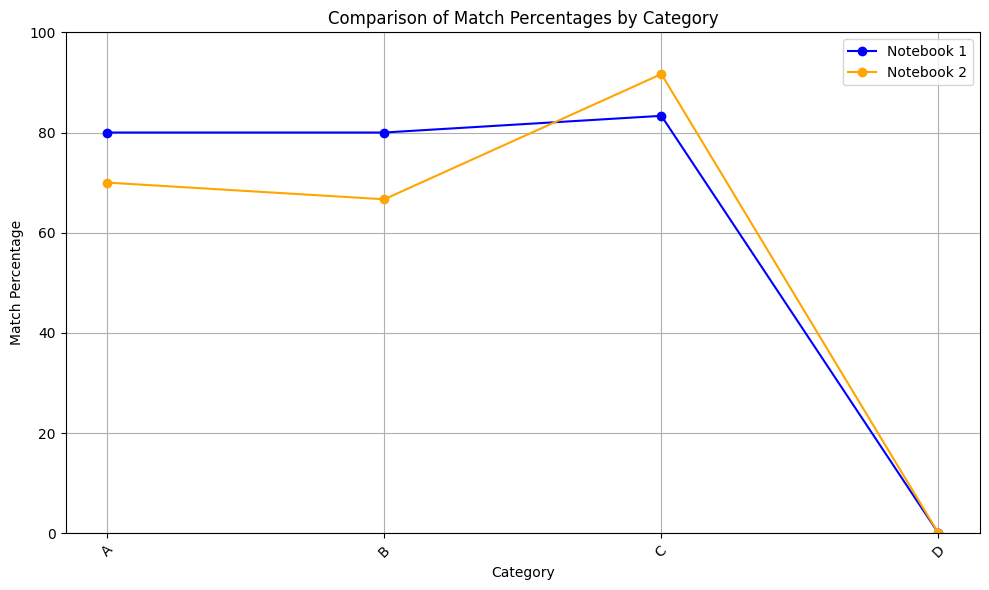

In [ ]:
import matplotlib.pyplot as plt

# Prepare the data for visualization
matched_comparison.set_index('category', inplace=True)

# Plotting the match percentages from both notebooks
plt.figure(figsize=(10, 6))

# Plot for Notebook 1
plt.plot(matched_comparison.index, matched_comparison['match_percentage_notebook1'],
         marker='o', label='Notebook 1', color='blue')

# Plot for Notebook 2
plt.plot(matched_comparison.index, matched_comparison['match_percentage_notebook2'],
         marker='o', label='Notebook 2', color='orange')

# Adding labels and title
plt.title('Comparison of Match Percentages by Category')
plt.xlabel('Category')
plt.ylabel('Match Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 percent
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculating the percentage of each category
category_counts = news_art['category'].value_counts(normalize=True) * 100
category_counts = category_counts.reset_index()
category_counts.columns = ['category', 'percentage']

category_counts

NameError: name 'news_art' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plotting the category percentages
plt.figure(figsize=(8, 5))
plt.bar(category_counts['category'], category_counts['percentage'], color=['blue', 'orange', 'green'])
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each Category in Dataset')
plt.ylim(0, 100)
plt.grid(axis='y')

# Adding percentage labels on top of the bars
for index, value in enumerate(category_counts['percentage']):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.tight_layout()
plt.show()


NameError: name 'category_counts' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Dummy data for testing (you can skip this if you already defined the dataframes)
data = {
    'category': ['A', 'B', 'C', 'D', 'E', 'F'],
    'match_count': [80, 60, 50, 0, 25, 10],
    'total_count': [100, 75, 60, 10, 40, 20],
}
df = pd.DataFrame(data)
df['percentage'] = (df['match_count'] / df['total_count']) * 100

# Prepare the data for visualization
matched_comparison.set_index('category', inplace=True)

# Calculate the percentage of each category
category_counts = df['category'].value_counts(normalize=True) * 100
category_counts = category_counts.reset_index()
category_counts.columns = ['category', 'relative_percentage']

# Create a new DataFrame to combine both match percentages and relative existence
comparison_data = matched_comparison.join(category_counts.set_index('category'), how='left')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for match percentages from Notebook 1 and 2
ax1.plot(comparison_data.index, comparison_data['match_percentage_notebook1'],
         marker='o', label='Notebook 1', color='blue')
ax1.plot(comparison_data.index, comparison_data['match_percentage_notebook2'],
         marker='o', label='Notebook 2', color='orange')

# Adding labels and title for primary y-axis
ax1.set_title('Comparison of Match Percentages and Relative Existence by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Match Percentage (%)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 100)  # Set y-axis limits from 0 to 100 percent
ax1.grid(True)

# Create a secondary y-axis for relative percentages
ax2 = ax1.twinx()
ax2.bar(comparison_data.index, comparison_data['relative_percentage'],
        alpha=0.3, color='green', label='Relative Existence (%)')

# Adding label and ticks for the secondary y-axis
ax2.set_ylabel('Relative Existence (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 100)  # Set limits for relative existence

# Combine legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
ax1.legend(loc='upper left')
ax2.legend(['Relative Existence (%)'], loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Runtime
It is also important to compare the run with its runtime and the achieved coherence score of both Versions.

Where a higher coherence score is better because it stands for a higher quality of calculated topics.

In [ ]:
import pandas as pd

# Dummy data for Notebook 1 (similar structure to what you might have)
data_notebook1 = {
    'Run': [1, 2, 3, 4],
    'Duration (minutes)': [0.05, 0.06, 0.07, 0.06],
    'Coherence Score': [0.30, 0.32, 0.29, 0.28]
}
df_notebook1 = pd.DataFrame(data_notebook1)

# Dummy data for Notebook 2 (this should match your run_details DataFrame)
data_notebook2 = {
    'Run': [1, 2, 3, 4],
    'Start Time': ['2024-10-14 14:14:43', '2024-10-14 14:14:46',
                   '2024-10-14 14:14:50', '2024-10-14 14:14:53'],
    'End Time': ['2024-10-14 14:14:46', '2024-10-14 14:14:50',
                 '2024-10-14 14:14:53', '2024-10-14 14:14:57'],
    'Duration (minutes)': [0.054248, 0.055266, 0.061482, 0.059552],
    'Coherence Score': [0.298383, 0.313973, 0.289475, 0.286153]
}
df_notebook2 = pd.DataFrame(data_notebook2)

# Display the data for verification
print("Notebook 1 Data:")
print(df_notebook1)

print("\nNotebook 2 Data:")
print(df_notebook2)


Notebook 1 Data:
   Run  Duration (minutes)  Coherence Score
0    1                0.05             0.30
1    2                0.06             0.32
2    3                0.07             0.29
3    4                0.06             0.28

Notebook 2 Data:
   Run           Start Time             End Time  Duration (minutes)  \
0    1  2024-10-14 14:14:43  2024-10-14 14:14:46            0.054248   
1    2  2024-10-14 14:14:46  2024-10-14 14:14:50            0.055266   
2    3  2024-10-14 14:14:50  2024-10-14 14:14:53            0.061482   
3    4  2024-10-14 14:14:53  2024-10-14 14:14:57            0.059552   

   Coherence Score  
0         0.298383  
1         0.313973  
2         0.289475  
3         0.286153  


In [ ]:
# Merge the DataFrames on the 'Run' column
merged_df = pd.merge(df_notebook1, df_notebook2[['Run', 'Duration (minutes)', 'Coherence Score']],
                     on='Run', suffixes=('_notebook1', '_notebook2'), how='outer')

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
   Run  Duration (minutes)_notebook1  Coherence Score_notebook1  \
0    1                          0.05                       0.30   
1    2                          0.06                       0.32   
2    3                          0.07                       0.29   
3    4                          0.06                       0.28   

   Duration (minutes)_notebook2  Coherence Score_notebook2  
0                      0.054248                   0.298383  
1                      0.055266                   0.313973  
2                      0.061482                   0.289475  
3                      0.059552                   0.286153  


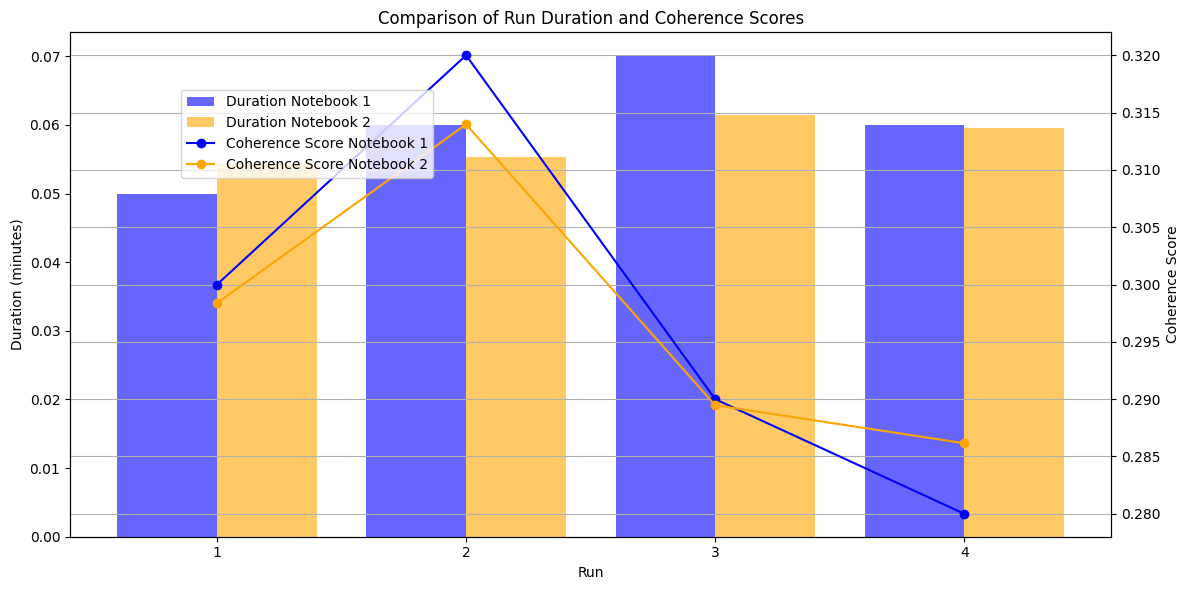

In [ ]:
import matplotlib.pyplot as plt

# Plotting the run duration and coherence scores from both notebooks
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for Duration
ax1.bar(merged_df['Run'] - 0.2, merged_df['Duration (minutes)_notebook1'],
        width=0.4, label='Duration Notebook 1', color='blue', alpha=0.6)
ax1.bar(merged_df['Run'] + 0.2, merged_df['Duration (minutes)_notebook2'],
        width=0.4, label='Duration Notebook 2', color='orange', alpha=0.6)

# Adding labels for the first y-axis
ax1.set_xlabel('Run')
ax1.set_ylabel('Duration (minutes)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a secondary y-axis for coherence scores
ax2 = ax1.twinx()
ax2.plot(merged_df['Run'], merged_df['Coherence Score_notebook1'],
         marker='o', label='Coherence Score Notebook 1', color='blue')
ax2.plot(merged_df['Run'], merged_df['Coherence Score_notebook2'],
         marker='o', label='Coherence Score Notebook 2', color='orange')

# Adding labels and title for the secondary y-axis
ax2.set_ylabel('Coherence Score', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# Adding title
plt.title('Comparison of Run Duration and Coherence Scores')
plt.xticks(merged_df['Run'])  # Set x-ticks to be the run numbers
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


## General Comparison
We compare the two implemented Methods regarding parameters not yet evaluated.

So was the underlying process for each Method quite similar:
1. Data was cleaned and prepared for proper use in the training step
2. Training the LDA function
3. Evaluating the result and setting into context

The pros and cons for *simple_lda* were as following:

**Pros:**
* Lorem Ipsum

**Cons:**
* Lorem Ipsum

For the *improved_lda* were the pros and cons as following:

**Pros:**
* LDA Method in a improved form
* Insightful Data when comparing to *simple_lda*
* More steps to improve


**Cons:**
* Complex to implement the method as introduced in the Paper
* Extensive runtime on a local machine

Therefore the implemented solution for *improved_lda* is not really necessary when training a LDA, at least when the data is prepared properly.

# Challenges & Improvements

## Conclusion